In [1]:
import pandas as pd
data_frame= pd.read_csv("ODI Player Innings Stats - All Teams.csv")
print(data_frame.info())

C:\Users\S533718\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,1,2,6,7,8,9,10,11,12,13,14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171968 entries, 0 to 171967
Data columns (total 28 columns):
Innings Player                   85774 non-null object
Innings Runs Scored              85774 non-null object
Innings Runs Scored Num          85774 non-null object
Innings Minutes Batted           85774 non-null float64
Innings Batted Flag              85774 non-null float64
Innings Not Out Flag             85774 non-null float64
Innings Balls Faced              85774 non-null object
Innings Boundary Fours           85774 non-null object
Innings Boundary Sixes           85774 non-null object
Innings Batting Strike Rate      85774 non-null object
Innings Number                   85774 non-null object
Opposition                       85774 non-null object
Ground                           85774 non-null object
Innings Date                     85774 non-null object
Country                          85774 non-null object
50's                             85774 non-null float64
100's

In [9]:
data_copy_1 = data_frame.copy()
data_copy_1.dropna(axis='index', how='all', inplace=True)
data_copy_1.info()

data_copy_2 = data_copy_1.copy()
data_copy_2.drop(labels="Innings Overs Bowled", axis='columns', inplace=True)
data_copy_2.drop(labels="Innings Bowled Flag", axis='columns', inplace=True)
data_copy_2.drop(labels="Innings Maidens Bowled", axis='columns', inplace=True)
data_copy_2.drop(labels="Innings Runs Conceded", axis='columns', inplace=True)
data_copy_2.drop(labels="Innings Wickets Taken", axis='columns', inplace=True)
data_copy_2.drop(labels="4 Wickets", axis='columns', inplace=True)
data_copy_2.drop(labels="5 Wickets", axis='columns', inplace=True)
data_copy_2.drop(labels="10 Wickets", axis='columns', inplace=True)
data_copy_2.drop(labels="Innings Wickets Taken Buckets", axis='columns', inplace=True)
data_copy_2.drop(labels="Innings Economy Rate", axis='columns', inplace=True)
data_copy_2.drop(labels="Innings Runs Scored Buckets", axis='columns', inplace=True)
indexNames = data_copy_2[(data_copy_2['Innings Minutes Batted'].isin(['-']))].index
data_copy_2.drop(indexNames , inplace=True)

print(data_copy_2.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 85774 entries, 0 to 85773
Data columns (total 28 columns):
Innings Player                   85774 non-null object
Innings Runs Scored              85774 non-null object
Innings Runs Scored Num          85774 non-null object
Innings Minutes Batted           85774 non-null float64
Innings Batted Flag              85774 non-null float64
Innings Not Out Flag             85774 non-null float64
Innings Balls Faced              85774 non-null object
Innings Boundary Fours           85774 non-null object
Innings Boundary Sixes           85774 non-null object
Innings Batting Strike Rate      85774 non-null object
Innings Number                   85774 non-null object
Opposition                       85774 non-null object
Ground                           85774 non-null object
Innings Date                     85774 non-null object
Country                          85774 non-null object
50's                             85774 non-null float64
100's  

I choose No. of balls faced as my X-axis and No. of runs scored as my Y-axis to predict the score of a batsman that if he has played certain amount of balls.

In [10]:

data_copy_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85774 entries, 0 to 85773
Data columns (total 17 columns):
Innings Player                 85774 non-null object
Innings Runs Scored            85774 non-null object
Innings Runs Scored Num        85774 non-null object
Innings Minutes Batted         85774 non-null float64
Innings Batted Flag            85774 non-null float64
Innings Not Out Flag           85774 non-null float64
Innings Balls Faced            85774 non-null object
Innings Boundary Fours         85774 non-null object
Innings Boundary Sixes         85774 non-null object
Innings Batting Strike Rate    85774 non-null object
Innings Number                 85774 non-null object
Opposition                     85774 non-null object
Ground                         85774 non-null object
Innings Date                   85774 non-null object
Country                        85774 non-null object
50's                           85774 non-null float64
100's                          85774 no

In [11]:
data_copy_3 = data_copy_2.dropna(subset=['Innings Balls Faced'])
data_copy_4=data_copy_3.replace(to_replace ="-", 
                 value = 0) 
data_copy_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85774 entries, 0 to 85773
Data columns (total 17 columns):
Innings Player                 85774 non-null object
Innings Runs Scored            85774 non-null object
Innings Runs Scored Num        85774 non-null object
Innings Minutes Batted         85774 non-null float64
Innings Batted Flag            85774 non-null float64
Innings Not Out Flag           85774 non-null float64
Innings Balls Faced            85774 non-null object
Innings Boundary Fours         85774 non-null object
Innings Boundary Sixes         85774 non-null object
Innings Batting Strike Rate    85774 non-null object
Innings Number                 85774 non-null object
Opposition                     85774 non-null object
Ground                         85774 non-null object
Innings Date                   85774 non-null object
Country                        85774 non-null object
50's                           85774 non-null float64
100's                          85774 no

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data_copy_4, test_size=0.2, random_state=123)
print(len(train_set), len(test_set))

68619 17155


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
R2 is 0.857255570810685
Mean Square Error is  93.88382165744
The root mean square error is  9.689366421879193


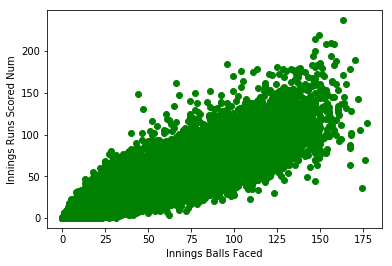

In [14]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
reg = LinearRegression()
X = train_set[['Innings Balls Faced']]
Y = train_set['Innings Runs Scored Num']
print(reg.fit(X, Y))
print("R2 is", reg.score(X,Y))

Y_prediction = reg.predict(X)
Mean_Sq_Error = mean_squared_error(Y, Y_prediction)
print("Mean Square Error is ", Mean_Sq_Error )

root_mean_sq_error = math.sqrt(Mean_Sq_Error)
print("The root mean square error is ", root_mean_sq_error)
plt.scatter(x=X,y=Y,marker="o",c="green")
plt.xlabel("Innings Balls Faced")
plt.ylabel("Innings Runs Scored Num")
plt.savefig("figure1.png")
plt.show()

85% of the predicted value is determined by the input.

In [93]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
reg = LinearRegression()
X = train_set[['Innings Balls Faced','Innings Batting Strike Rate']]
Y = train_set['Innings Runs Scored Num']
print(reg.fit(X, Y))
print("R2 is", reg.score(X,Y))

Y_prediction = reg.predict(X)
Mean_Sq_Error = mean_squared_error(Y, Y_prediction)
print("Mean Square Error is ", Mean_Sq_Error )

root_mean_sq_error = math.sqrt(Mean_Sq_Error)
print("The root mean square error is ", root_mean_sq_error)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 is 0.8903168287861005
Mean Square Error is  72.13924454740831
The root mean square error is  8.493482474663047


Upon adding another feature 'Innings Batting Strike Rate'  prediction rate has increased to 89%

In [94]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
reg = LinearRegression()
X = test_set[['Innings Balls Faced','Innings Batting Strike Rate']]
Y = test_set['Innings Runs Scored Num']
print(reg.fit(X, Y))
print("R2 is", reg.score(X,Y))

Y_prediction = reg.predict(X)
Mean_Sq_Error = mean_squared_error(Y, Y_prediction)
print("Mean Square Error is ", Mean_Sq_Error )

root_mean_sq_error = math.sqrt(Mean_Sq_Error)
print("The root mean square error is ", root_mean_sq_error)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 is 0.8952146124592884
Mean Square Error is  67.15383663392792
The root mean square error is  8.194744452020936


There is not much change in the regression value between train and test set